In [467]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = "AppleGothic"

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

from pycaret.regression import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


import pandas_profiling
import statsmodels.api as sm

from sklearn.decomposition import PCA

In [468]:
row_data = pd.read_csv('/Users/gimdong-wan/Desktop/DataCampus/data/final_data/500grid_data.csv')
grid_500 = pd.read_csv('/Users/gimdong-wan/Desktop/DataCampus/data/final_data/500grid_data.csv')

In [469]:
grid_500['성폭력취약인구'] = grid_500['고등여성인구']+grid_500['20대여성인구']
grid_500['GRADE_폭력'] = grid_500['GRADE_폭력'].apply(lambda x: x-1 if x>0 else x)
grid_500['GRADE_절도'] = grid_500['GRADE_절도'].apply(lambda x: x-1 if x>0 else x)
grid_500['GRADE_성폭력'] = grid_500['GRADE_성폭력'].apply(lambda x: x-1 if x>0 else x)

In [470]:
grid_500['GRADE_폭력'].value_counts()

0     588
1     115
3      53
4      45
5      41
6      27
2      22
7      17
10      5
8       3
9       2
Name: GRADE_폭력, dtype: int64

In [471]:
grid_500['폭력범주']=0

폭력없음 폭력등급_1, 폭력등급_2, 폭력등급_3, 폭력등급_4,폭력등급_5

In [472]:
grid_500.loc[grid_500['GRADE_폭력']==0,'폭력범주'] = 0
grid_500.loc[(grid_500['GRADE_폭력']>0)&(grid_500['GRADE_폭력']<3),'폭력범주'] = 1
grid_500.loc[(grid_500['GRADE_폭력']>2)&(grid_500['GRADE_폭력']<5),'폭력범주'] = 2
grid_500.loc[(grid_500['GRADE_폭력']>4)&(grid_500['GRADE_폭력']<7),'폭력범주'] = 3
grid_500.loc[(grid_500['GRADE_폭력']>6)&(grid_500['GRADE_폭력']<9),'폭력범주'] = 4
grid_500.loc[(grid_500['GRADE_폭력']>8)&(grid_500['GRADE_폭력']<11),'폭력범주'] = 5

In [473]:
grid_500['폭력범주'].value_counts()

0    588
1    137
2     98
3     68
4     20
5      7
Name: 폭력범주, dtype: int64

In [474]:
numerical_feats = grid_500.dtypes[grid_500.dtypes != "object"].index.tolist()
numerical_feats.remove('INDEX')
numerical_feats.remove('GRADE_폭력')
numerical_feats.remove('GRADE_절도')
numerical_feats.remove('GRADE_성폭력')
numerical_feats.remove('폭력범주')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = grid_500.dtypes[grid_500.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  2


In [475]:
scaler = StandardScaler()
grid_500[numerical_feats] = scaler.fit_transform(grid_500[numerical_feats])

In [476]:
grid_500.columns

Index(['INDEX', 'ID', '총인구', '남성인구', '여성인구', '고등여성인구', '20대여성인구', '유소년인구',
       '고령인구', '30년이상35년미만건축물', '35년이상건축물', '개별주택가격', '공시지가', '행정동코드', '가로등',
       '공영주차장', '공중화장실', '교육시설', '교통사고_19', '교통사고_20', '노숙인시설', '대규모점포',
       '대부업현황', '룸살롱', '버스정류장', '보안등', '상가', '숙박업소', '술집', '어린이보호', '어린이집',
       '오락시설', '원룸_오피스텔', '유흥시설', '음식점', '자율방범대', '파출소', 'cctv', '신호등', '횡단보도',
       'GRADE_폭력', 'GRADE_절도', 'GRADE_성폭력', '성폭력취약인구', '폭력범주'],
      dtype='object')

In [477]:
feature_list = list(grid_500.drop(columns = ['행정동코드','INDEX','ID','GRADE_절도','GRADE_성폭력','GRADE_폭력','폭력범주','교통사고_19','교통사고_20','20대여성인구','고등여성인구']).columns)
feature = grid_500[feature_list]
target = grid_500['폭력범주']

In [478]:
selected = grid_500[['총인구', '남성인구', '유소년인구', '35년이상건축물','개별주택가격', '가로등', '노숙인시설', '대규모점포', '룸살롱', '보안등',
          '술집', '원룸_오피스텔', 'cctv','신호등', '횡단보도', '성폭력취약인구']]

In [514]:
feature_list = list(grid_500.drop(columns = ['행정동코드','INDEX','ID','GRADE_절도','GRADE_성폭력','GRADE_폭력','폭력범주','교통사고_19','교통사고_20','오락시설','20대여성인구','고등여성인구','노숙인시설','남성인구','여성인구']).columns)
feature = grid_500[feature_list]
target = grid_500['폭력범주']

In [515]:
x = sm.add_constant(feature, prepend = False)

mnlogit_mod = sm.MNLogit(target, x)
mnlogit_fit = mnlogit_mod.fit(method='bfgs')

print (mnlogit_fit.summary())

         Current function value: 0.520773
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                          MNLogit Regression Results                          
Dep. Variable:                   폭력범주   No. Observations:                  918
Model:                        MNLogit   Df Residuals:                      763
Method:                           MLE   Df Model:                          150
Date:                Thu, 19 Aug 2021   Pseudo R-squ.:                  0.5356
Time:                        02:09:58   Log-Likelihood:                -478.07
converged:                      False   LL-Null:                       -1029.4
Covariance Type:            nonrobust   LLR p-value:                9.008e-145
       폭력범주=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
총인구              -0.0536      5.266     -0.010      0.992     -10.374 

In [460]:
model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
acc=accuracy_score(target,y_pred)
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=target, y_pred=y_pred) 
con_mat 

accuracy = 0.8126361655773421


array([[569,  19,   0,   0,   0,   0],
       [ 70,  56,  10,   1,   0,   0],
       [ 13,  18,  58,   9,   0,   0],
       [  2,   8,  17,  40,   1,   0],
       [  0,   0,   2,   2,  16,   0],
       [  0,   0,   0,   0,   0,   7]])

In [274]:
model.coef_

array([[-3.48745695e-01, -5.07775506e-01, -1.70057842e-01,
         5.85653158e-01, -3.97680354e-01,  8.11177609e-01,
        -1.56427396e+00, -9.80656338e-01, -8.05403372e-01,
        -5.11312393e-01, -4.22321203e-01, -5.32962478e-01,
        -5.17868109e-01, -4.21934063e-01, -5.82158562e-02,
         8.28529272e-02, -3.54961479e-02, -1.76198871e-01,
        -2.84365137e-01, -1.98214512e-02,  5.30211084e-01,
        -1.91203135e+00,  1.35365737e-01,  8.25628680e-01,
        -3.65839497e-01, -2.49532217e-01, -1.47389860e-01,
         3.93087985e-01, -2.49406532e-02, -1.33931644e-02,
         6.04609349e-02,  6.50734961e-02, -7.90794100e-01,
         2.52977438e-01, -9.99164245e-02, -1.94893060e-01],
       [-1.68894308e-01, -3.05012604e-01, -7.14183676e-02,
        -2.10451757e-01, -8.52384529e-03,  2.06541035e-01,
        -5.91512282e-02,  6.14301157e-01, -4.33001492e-01,
         2.68260734e-01,  2.15629109e-01,  1.77727215e-01,
        -3.08739000e-03,  2.15640104e-01, -1.02008220e-

In [275]:
model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='ovr')
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
acc=accuracy_score(target,y_pred)
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=target, y_pred=y_pred) 
con_mat 

accuracy = 0.8061002178649237


array([[576,  12,   0,   0,   0,   0],
       [ 77,  51,   9,   0,   0,   0],
       [ 20,  13,  54,  10,   1,   0],
       [  4,   6,  19,  38,   1,   0],
       [  0,   0,   2,   4,  14,   0],
       [  0,   0,   0,   0,   0,   7]])

In [276]:
from sklearn.metrics import classification_report
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       588
           1       0.62      0.37      0.47       137
           2       0.64      0.55      0.59        98
           3       0.73      0.56      0.63        68
           4       0.88      0.70      0.78        20
           5       1.00      1.00      1.00         7

    accuracy                           0.81       918
   macro avg       0.79      0.69      0.73       918
weighted avg       0.79      0.81      0.79       918



In [277]:
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(grid_500)):
    df_train = grid_500.iloc[idx_train]
    df_test = grid_500.iloc[idx_test]
    feature_list = list(grid_500.drop(columns = ['행정동코드','INDEX','ID','GRADE_절도','GRADE_성폭력','GRADE_폭력','폭력범주']).columns)
    feature = df_train[feature_list]
    target = df_train['폭력범주']
    
    
    model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
    model.fit(X=feature, y=target) # 학습수행 
    y_pred1 = model.predict(X = feature)
    y_pred2 = model.predict(X = df_test[feature_list])
    acc_1=accuracy_score(target,y_pred1)
    acc_2=accuracy_score(df_test['폭력범주'],y_pred2)
    
    scores[i] = acc_2
    print("학습 Accuracy = {:.8f}, 검증 Accuracy = {:.8f}".format(acc_1, acc_2))
print(scores)
scores.mean()

학습 Accuracy = 0.82425068, 검증 Accuracy = 0.79891304
학습 Accuracy = 0.82425068, 검증 Accuracy = 0.73913043
학습 Accuracy = 0.81880109, 검증 Accuracy = 0.75000000
학습 Accuracy = 0.82585034, 검증 Accuracy = 0.74316940
학습 Accuracy = 0.82448980, 검증 Accuracy = 0.72677596
[0.79891304 0.73913043 0.75       0.7431694  0.72677596]


0.7515977666904253

In [278]:
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(grid_500)):
    df_train = grid_500.iloc[idx_train]
    df_test = grid_500.iloc[idx_test]
    feature_list = list(grid_500.drop(columns = ['행정동코드','INDEX','ID','GRADE_절도','GRADE_성폭력','GRADE_폭력','폭력범주']).columns)
    feature = df_train[feature_list]
    target = df_train['폭력범주']
    
    
    model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='ovr')
    model.fit(X=feature, y=target) # 학습수행 
    y_pred1 = model.predict(X = feature)
    y_pred2 = model.predict(X = df_test[feature_list])
    acc_1=accuracy_score(target,y_pred1)
    acc_2=accuracy_score(df_test['폭력범주'],y_pred2)
    
    scores[i] = acc_2
    print("학습 Accuracy = {:.8f}, 검증 Accuracy = {:.8f}".format(acc_1, acc_2))
print(scores)
scores.mean()

학습 Accuracy = 0.80926431, 검증 Accuracy = 0.79347826
학습 Accuracy = 0.81335150, 검증 Accuracy = 0.76086957
학습 Accuracy = 0.81471390, 검증 Accuracy = 0.76086957
학습 Accuracy = 0.82176871, 검증 Accuracy = 0.73770492
학습 Accuracy = 0.80816327, 검증 Accuracy = 0.72677596
[0.79347826 0.76086957 0.76086957 0.73770492 0.72677596]


0.7559396531242576

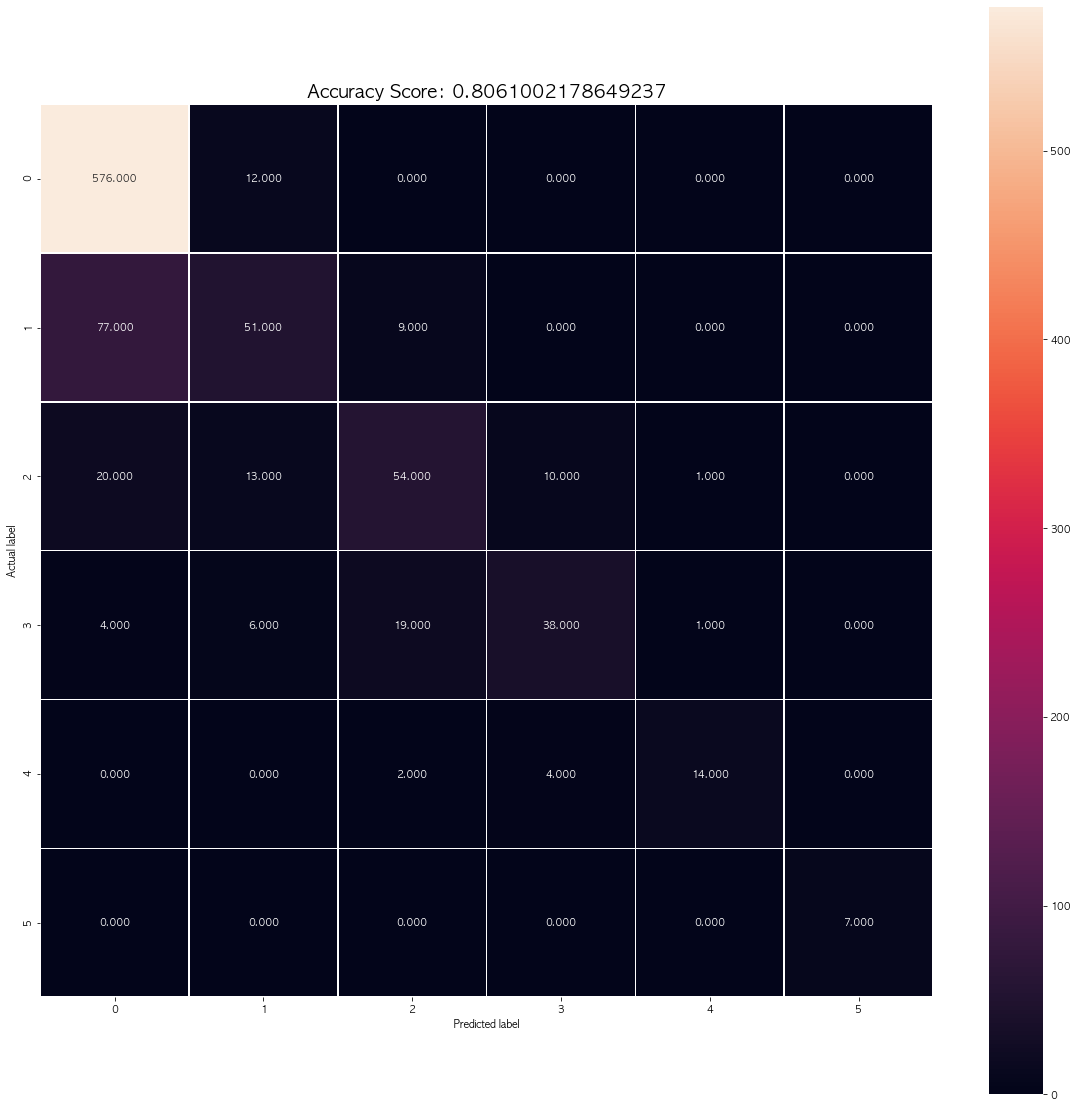

In [279]:
plt.figure(figsize=(20,20)) # chart size 
sns.heatmap(con_mat, annot=True, fmt=".3f", linewidths=.5, square = True);# , cmap = 'Blues_r' : map »ö»ó  
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Accuracy Score: {0}'.format(acc) 
plt.title(all_sample_title, size = 18) 
plt.show() 

In [ ]:
model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
acc=accuracy_score(target,y_pred)
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=target, y_pred=y_pred) 
con_mat 

In [530]:
a = grid_500[grid_500['폭력범주']!=0]

In [533]:
a_x = a[feature_list]

In [534]:
a_y = a['폭력범주']

In [536]:
model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
model.fit(X=a_x, y=a_y) # 학습수행 
y_pred = model.predict(X = a_x)
acc=accuracy_score(a_y,y_pred)
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=a_y, y_pred=y_pred) 
con_mat 

accuracy = 0.7454545454545455


array([[125,  10,   2,   0,   0],
       [ 31,  59,   8,   0,   0],
       [  9,  18,  40,   1,   0],
       [  1,   2,   2,  15,   0],
       [  0,   0,   0,   0,   7]])

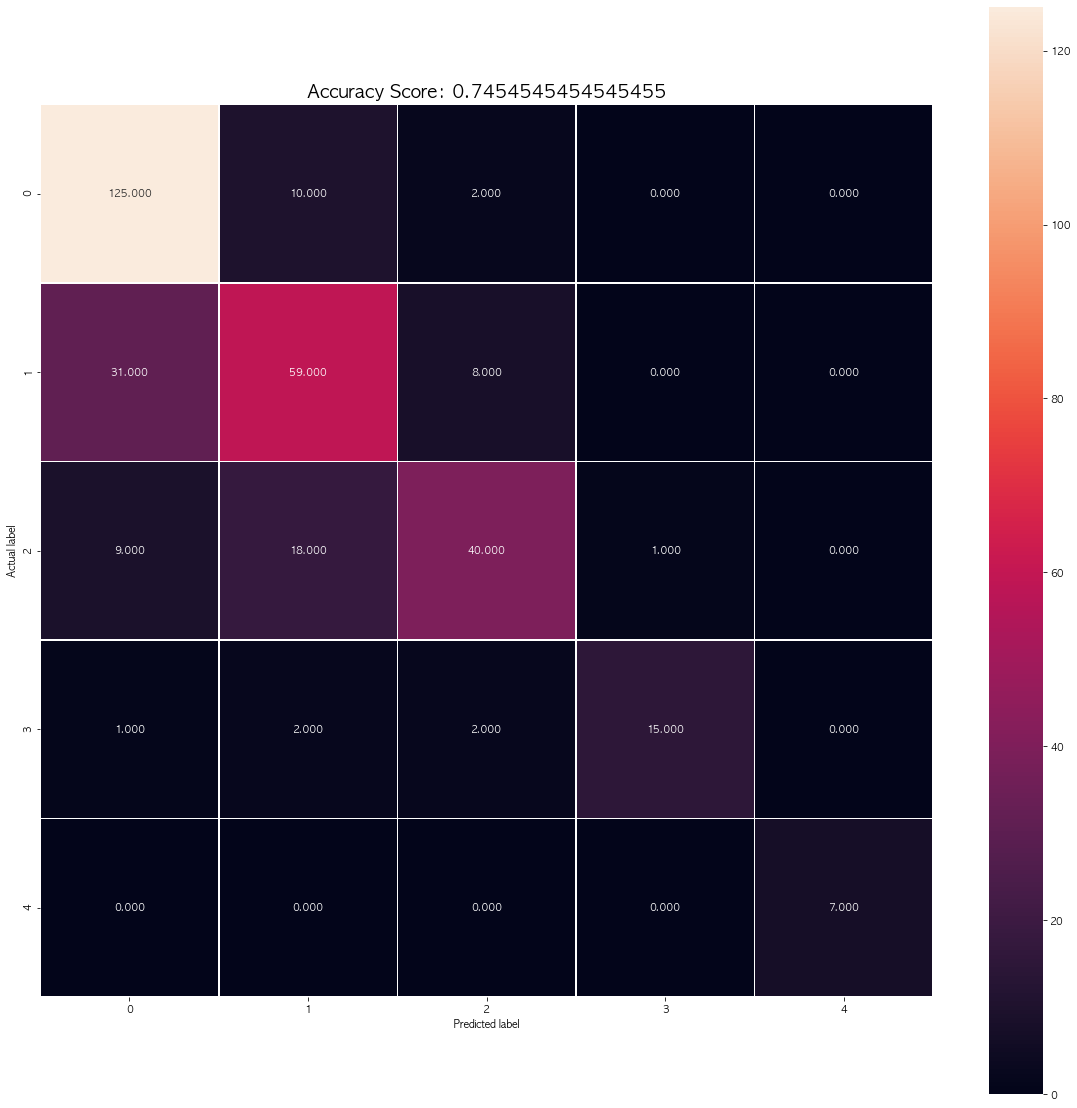

In [537]:
plt.figure(figsize=(20,20)) # chart size 
sns.heatmap(con_mat, annot=True, fmt=".3f", linewidths=.5, square = True);# , cmap = 'Blues_r' : map »ö»ó  
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Accuracy Score: {0}'.format(acc) 
plt.title(all_sample_title, size = 18) 
plt.show() 

In [280]:
model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
acc=accuracy_score(target,y_pred)
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=target, y_pred=y_pred) 
con_mat 

accuracy = 0.8244897959183674


array([[458,  15,   1,   1,   0,   0],
       [ 58,  45,   8,   1,   0,   0],
       [  9,  15,  48,   4,   0,   0],
       [  0,   4,  11,  35,   1,   0],
       [  0,   0,   1,   0,  14,   0],
       [  0,   0,   0,   0,   0,   6]])

In [281]:
selected_list = list(selected.columns)

In [282]:
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(grid_500)):
    df_train = grid_500.iloc[idx_train]
    df_test = grid_500.iloc[idx_test]
    feature_list = list(selected.columns)
    feature = df_train[feature_list]
    target = df_train['폭력범주']
    
    
    model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
    model.fit(X=feature, y=target) # 학습수행 
    y_pred1 = model.predict(X = feature)
    y_pred2 = model.predict(X = df_test[feature_list])
    acc_1=accuracy_score(target,y_pred1)
    acc_2=accuracy_score(df_test['폭력범주'],y_pred2)
    
    scores[i] = acc_2
    print("학습 Accuracy = {:.8f}, 검증 Accuracy = {:.8f}".format(acc_1, acc_2))
scores
scores.mean()

학습 Accuracy = 0.78692494, 검증 Accuracy = 0.75000000
학습 Accuracy = 0.77723971, 검증 Accuracy = 0.81521739
학습 Accuracy = 0.79055690, 검증 Accuracy = 0.71739130
학습 Accuracy = 0.78450363, 검증 Accuracy = 0.75000000
학습 Accuracy = 0.77845036, 검증 Accuracy = 0.76086957
학습 Accuracy = 0.77966102, 검증 Accuracy = 0.76086957
학습 Accuracy = 0.78571429, 검증 Accuracy = 0.71739130
학습 Accuracy = 0.77845036, 검증 Accuracy = 0.71739130
학습 Accuracy = 0.78960097, 검증 Accuracy = 0.68131868
학습 Accuracy = 0.78113664, 검증 Accuracy = 0.76923077


0.7439679885332059

In [283]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [284]:
model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
acc=accuracy_score(target,y_pred)
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=target, y_pred=y_pred) 
con_mat 

accuracy = 0.781136638452237


array([[510,  15,   0,   1,   0,   0],
       [ 73,  38,  12,   1,   0,   0],
       [ 15,  16,  49,  10,   0,   0],
       [  4,   5,  22,  33,   0,   0],
       [  0,   0,   2,   5,  10,   0],
       [  0,   0,   0,   0,   0,   6]])

In [285]:
mod_prob = OrderedModel(target,
                        feature,
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 0.665053
         Iterations: 60
         Function evaluations: 62
         Gradient evaluations: 62


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                   폭력범주   Log-Likelihood:                -550.00
Model:                   OrderedModel   AIC:                             1142.
Method:            Maximum Likelihood   BIC:                             1241.
Date:                Thu, 19 Aug 2021                                         
Time:                        01:15:33                                         
No. Observations:                 827                                         
Df Residuals:                     806                                         
Df Model:                          21                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
총인구           -2.4597      1.462     -1.683      0.092      -5.324       0.405
남성인구           4.8994      1.440      3.403      0.001       2.077       7.722
유소년인구         -0.8544      0.137     -6.223      0.000      -1.123      -0.585
35년이상건축물       0.1099      0.057      1.924      0.054      -0.002       0.222
개별주택가격         0.4874      0.059      8.310      0.000       0.372       0.602
가로등            0.2544      0.068      3.730      0.000       0.121       0.388
노숙인시설          0.0673      0.037      1.797      0.072      -0.006       0.141
대규모점포         -0.0658      0.041     -1.587      0.112      -0.147       0.015
룸살롱            0.1350      0.052      2.603      0.009       0.033       0.237
보안등           -0.3198      0.057     -5.644      0.000      -0.431      -0.209
술집             0.2758      0.068      4.057      0.000       0.143       0.409
원룸_오피스텔       -0.2037      0.065     -3.114      0.002      -0.332      -0.075
cctv           0.3599      0.084      4.307      0.000       0.196       0.524
신호등           -0.0133      0.075     -0.178      0.859      -0.160       0.134
횡단보도           0.1896      0.075      2.521      0.012       0.042       0.337
성폭력취약인구       -1.2004      0.253     -4.745      0.000      -1.696      -0.705
0/1            0.2521      0.059      4.245      0.000       0.136       0.368
1/2            0.0225      0.083      0.273      0.785      -0.139       0.184
2/3            0.2238      0.096      2.343      0.019       0.037       0.411
3/4            0.5714      0.114      4.998      0.000       0.347       0.796
4/5            0.4824      0.226      2.135      0.033       0.039       0.925
==============================================================================
"""

In [286]:
num_of_thresholds = 9
mod_prob.transform_threshold_params(res_prob.params[-num_of_thresholds:])

array([      -inf, 0.25208075, 1.27486301, 2.52563773, 4.29643815,
       5.91642411,        inf])

In [287]:
mod_prob = OrderedModel(target,
                        feature,
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs', disp=False)
res_prob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                   폭력범주   Log-Likelihood:                -548.76
Model:                   OrderedModel   AIC:                             1140.
Method:            Maximum Likelihood   BIC:                             1239.
Date:                Thu, 19 Aug 2021                                         
Time:                        01:15:35                                         
No. Observations:                 827                                         
Df Residuals:                     806                                         
Df Model:                          21                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
총인구           -4.3748      2.648     -1.652      0.098      -9.564       0.815
남성인구           8.7534      2.596      3.372      0.001       3.666      13.841
유소년인구         -1.4887      0.252     -5.917      0.000      -1.982      -0.996
35년이상건축물       0.2140      0.100      2.145      0.032       0.018       0.410
개별주택가격         0.8544      0.106      8.093      0.000       0.648       1.061
가로등            0.4533      0.130      3.491      0.000       0.199       0.708
노숙인시설          0.1021      0.083      1.236      0.216      -0.060       0.264
대규모점포         -0.1063      0.074     -1.445      0.149      -0.250       0.038
룸살롱            0.2137      0.097      2.207      0.027       0.024       0.403
보안등           -0.5908      0.100     -5.903      0.000      -0.787      -0.395
술집             0.5337      0.119      4.477      0.000       0.300       0.767
원룸_오피스텔       -0.3748      0.125     -3.003      0.003      -0.619      -0.130
cctv           0.6867      0.154      4.464      0.000       0.385       0.988
신호등           -0.0749      0.141     -0.533      0.594      -0.351       0.201
횡단보도           0.3176      0.131      2.421      0.015       0.060       0.575
성폭력취약인구       -2.1579      0.478     -4.517      0.000      -3.094      -1.222
0/1            0.3288      0.106      3.098      0.002       0.121       0.537
1/2            0.6635      0.088      7.532      0.000       0.491       0.836
2/3            0.8818      0.100      8.788      0.000       0.685       1.078
3/4            1.1620      0.119      9.797      0.000       0.930       1.394
4/5            1.1075      0.228      4.847      0.000       0.660       1.555
==============================================================================
"""

In [519]:
mod_prob = OrderedModel(target,
                        feature,
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs', disp=False)

In [520]:
res_prob

In [522]:
pred = res_prob.predict(feature)

In [523]:
pred['answer']=0

In [524]:
for i in range(len(pred)) :
    pred['answer'][i] = pred.loc[i].idxmax()

In [525]:
acc=accuracy_score(target,pred['answer'])
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=target, y_pred=pred['answer']) 
con_mat 

accuracy = 0.7440087145969498


array([[576,   7,   5,   0,   0,   0],
       [ 93,  23,  19,   2,   0,   0],
       [ 24,  13,  36,  23,   2,   0],
       [  3,  14,  14,  32,   5,   0],
       [  0,   0,   6,   3,  11,   0],
       [  0,   0,   0,   1,   1,   5]])

In [347]:
mod_prob = OrderedModel(target,
                        feature,
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
pred = res_prob.predict(feature)

Optimization terminated successfully.
         Current function value: 0.663612
         Iterations: 83
         Function evaluations: 85
         Gradient evaluations: 85


In [385]:
pred

,0,1,2,3,4,5,answer
0,0.260664,0.385464,0.300043,0.053236,5.929873e-04,4.831742e-07,0
1,0.000329,0.008088,0.115342,0.559487,3.002984e-01,1.645558e-02,0
2,0.727201,0.220243,0.050401,0.002152,3.599932e-06,4.022443e-10,0
3,0.000321,0.007943,0.114129,0.558461,3.024133e-01,1.673253e-02,0
4,0.913985,0.077404,0.008462,0.000150,7.645807e-08,2.503553e-12,0
...,...,...,...,...,...,...,...
913,0.910453,0.080403,0.008981,0.000163,8.620924e-08,2.925771e-12,0
914,0.910235,0.080587,0.009013,0.000164,8.683680e-08,2.953415e-12,0
915,0.908261,0.082258,0.009309,0.000172,9.268977e-08,3.214762e-12,0
916,0.910139,0.080669,0.009028,0.000164,8.711627e-08,2.965850e-12,0


In [444]:
pred['answer']=0

In [445]:
for i in range(len(pred)) :
    pred['answer'][i] = pred.loc[i].idxmax()

In [446]:
pred

,0,1,2,3,4,5,answer
0,0.260664,0.385464,0.300043,0.053236,5.929873e-04,4.831742e-07,1
1,0.000329,0.008088,0.115342,0.559487,3.002984e-01,1.645558e-02,3
2,0.727201,0.220243,0.050401,0.002152,3.599932e-06,4.022443e-10,0
3,0.000321,0.007943,0.114129,0.558461,3.024133e-01,1.673253e-02,3
4,0.913985,0.077404,0.008462,0.000150,7.645807e-08,2.503553e-12,0
...,...,...,...,...,...,...,...
913,0.910453,0.080403,0.008981,0.000163,8.620924e-08,2.925771e-12,0
914,0.910235,0.080587,0.009013,0.000164,8.683680e-08,2.953415e-12,0
915,0.908261,0.082258,0.009309,0.000172,9.268977e-08,3.214762e-12,0
916,0.910139,0.080669,0.009028,0.000164,8.711627e-08,2.965850e-12,0


In [435]:
acc=accuracy_score(target,pred['answer'])
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=target, y_pred=pred['answer']) 
con_mat 

accuracy = 0.7298474945533769


array([[578,   4,   6,   0,   0,   0],
       [ 94,  20,  21,   2,   0,   0],
       [ 27,   8,  28,  34,   1,   0],
       [  5,   9,  15,  33,   6,   0],
       [  0,   0,   4,   8,   6,   2],
       [  0,   0,   0,   0,   2,   5]])

In [433]:
target

0      2
1      3
2      1
3      2
4      0
      ..
913    0
914    0
915    0
916    0
917    0
Name: 폭력범주, Length: 918, dtype: int64

In [434]:
pred['answer']

0      1
1      3
2      0
3      3
4      0
      ..
913    0
914    0
915    0
916    0
917    0
Name: answer, Length: 918, dtype: int64

In [517]:
(X_train, X_test, y_train, y_test) = train_test_split(feature, target, train_size=0.8, random_state=1)
# 훈련 데이터와 테스트 데이터를 8:2로 나눕니다. 또한 데이터의 순서를 섞습니다.
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 훈련 데이터와 테스트 데이터에 대해서 원-핫 인코딩
print(y_train[:5])
print(y_test[:5])

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
